# Introduction to statistics

In this notebook we'll look at a complete example of a statistical analysis that touches all major topics described in the [No Bullshit Guide to Statistis outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit).
We'll illustrate all the statistics concepts shown in the book's [concept map](https://minireference.com/static/excerpts/noBSstats/conceptmaps/BookSubjectsOverview.pdf) using hands-on demonstrations based on Python code.

## Overview and concept map

In [1]:
# loading Python modules
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
from plotnine.themes.elements import element_blank

# notebooks figs setup
%matplotlib inline
import matplotlib, matplotlib.pyplot as plt

# silence please; developers at work
import warnings
warnings.filterwarnings('ignore')

## Example of a real-world use of statisitcs

A startup founder, let's call her Jenny, has come-up with a novel way to build a data science team at her company. Instead of hiring expensive data science specialists (business analyst, statisticians, machine learning experts), she has decided to upskill existing employees (both business and tech). She calls this the "everybody stats" policy, and plans to implement stats training of roughly 100h for all new hires.

Her **theory** is that new hires who complete the stats training will be able to "work smarter" and produce more value for the company during the time of their employment (see definition of ELV below). Sales people will get better at sales by analyzing customer data, developers will be able to prioritize performance issues in their code, system administrators will be able to optimize infrastructure to reduce costs, and operations will improve logistics, and project managers will have something useful to do instead of just asking for status updates.

- Employee Lifetime Value (ELV) is an objectively measured score that includes an employees total contributions to the company during their employment. This single number measures contributions to business value, solving problems, helping others, contributing ideas, etc. We assume that Jenny has some way of measuring ELV for all new hires.

In order to evaluate the effectiveness of of this "everybody stats" initiative, Jenny will require the stats training for half the new hires, while a the other half of new employees will not receive stats training and serve as the control group:

- Group A (control): employees with no statistics training 
- Group B (intervention): employees who receive statistics training 

Let's imagine that Jenny has collected ELV data for both groups in the form of a spreadsheet [data/employee_lifetime_values_records.ods](https://github.com/minireference/noBSstatsnotebooks/raw/main/data/employee_lifetime_values_records.ods).
In total, the spreadhseet contains the data for 61 emloyees, 31 in the control group (no stats training), and 30 in the intervention group (has received 100h of stats training).

In reality the data in this spreadhseet is "fake" data generated by yours truly using a random number generator:
- Group A data is normally distributed with mean **1000** and standard deviation 100, which is described mathematically as the random variable $X_{NS} = \mathcal{N}(1000,100)$
- Group B data is normally distributed with mean **1420** and standard deviation 100, which is described mathematically as the random variable $X_{S} = \mathcal{N}(1420,100)$.

If you're interested, you can learn more about the data generation process from the second sheet called "Random data generator" in [employee_lifetime_values_records.ods](https://github.com/minireference/noBSstatsnotebooks/raw/main/data/employee_lifetime_values_records.ods), but this is not essential for the rest of the analysis here.

**The imprtant thing to remember is that we know the "groud truth" about the data we're analyzing.** We know two facts (1) the average ELVs in the two groups are different (come from distributions with different means), and (2) the difference in means is $\Delta = 420$ points, meaning Group B **(statistics-trained employees) achive 420 points higher Employee Lifetime Value on average** as compared to Group A  (employees with no stats training).

In rest notebook we'll help Jenny compare the ELV values for the two groups using statistics. If statistics works, then Jenny should be able to use the data to reproduce same two facts: (1) stats training causes a statistically significan difference in ELV, and (2) compute and estimate of this difference between average ELVs that is close to true value 420.

### Let's see the data in Jenny's spreadhseet

We'll use the function `read_excel` in the `pandas` module, which have imported as the shorter alias `pd` to read the sheet named "Data" in the spreadhseet file.

In [2]:
rawdf = pd.read_excel("data/employee_lifetime_values_records.ods", sheet_name="Data")

# if you get an error on the above line, run this instead:
# rawdf = pd.read_excel("https://github.com/minireference/noBSstatsnotebooks/raw/main/data/employee_lifetime_values_records.ods", sheet_name="Data")

# the data extracted from the spreadsheet is now stored in rawdf, a pd.DataFrame object
# rawdf

In [3]:
# the "shape" of the dataframe is
rawdf.shape

(31, 2)

In [4]:
# we can quickly see the statistics for the two groups
rawdf.describe()

,Group A,Group B
count,31.000000,30.000000
mean,996.776345,1388.625627
std,334.389136,351.049624
min,264.264884,813.596201
25%,727.678481,1124.127234
50%,1048.354880,1389.564946
75%,1242.148180,1633.612809
max,1580.294381,2088.123891


The above table contains some useful summary for the two groups in the data. We can confirm we have 31 data points for Group A, 30 data points for Group B and see all the descriptive statistics like mean, standard deviation, min/max, and the quartiles (more on that later).

---

### Observed difference in means in the data sample

As a form of sanity check, let's check that the difference in means in the data sample we have roughly corresponds to the "groud truth" difference in means.

In [24]:
# sample mean for Group A
xbarA = rawdf['Group A'].mean()
print("The average ELV in group A is", xbarA)

# sample mean for Group B
xbarB = rawdf['Group B'].mean()
print("The average ELV in group B is", xbarB)

# compute d, the difference in ELV means between two groups
d = xbarB - xbarA
print("The difference between groups means is", d)

The average ELV in group A is 996.7763447708885
The average ELV in group B is 1388.6256269647888
The difference between groups means is 391.8492821939003


The observed difference is 410, which is close to the true value of $\Delta = 420$ so it seems the data generation process is working as expected and we can get started with the book overview using this as the running exmaple.

Will do all of stats in 20 minutes. Go get coffee if needed, because this is going to be intense! Are you ready for this?

# Chapter 1: DATA

In [6]:
tmpdf1 = rawdf.melt(var_name="group", value_name="ELV")
tmpdf1

,group,ELV
0,Group A,1122.447741
1,Group A,264.264884
2,Group A,1183.686615
3,Group A,1406.170817
4,Group A,836.393510
...,...,...
57,Group B,1036.916484
58,Group B,1336.606360
59,Group B,1025.672843
60,Group B,813.596201


In [7]:
tmpdf2 = tmpdf1.replace({"Group A": "A", "Group B": "B"})
tmpdf2

,group,ELV
0,A,1122.447741
1,A,264.264884
2,A,1183.686615
3,A,1406.170817
4,A,836.393510
...,...,...
57,B,1036.916484
58,B,1336.606360
59,B,1025.672843
60,B,813.596201


In [8]:
# clean data (remove NaN values)
df = tmpdf2.dropna()
df

,group,ELV
0,A,1122.447741
1,A,264.264884
2,A,1183.686615
3,A,1406.170817
4,A,836.393510
...,...,...
56,B,1504.284584
57,B,1036.916484
58,B,1336.606360
59,B,1025.672843


In [32]:
from scipy.stats import ttest_ind


xA = df[df["group"]=="A"]['ELV']
xB = df[df["group"]=="B"]['ELV']
# sns.histplot(data=xA, x="ELV", bins=10)
# sns.histplot(data=xB, x="ELV", bins=10)

ttest_ind(xA, xB).pvalue

3.6741242102575746e-05

In [34]:
ttest_ind(xA, xB, permutations=50000).pvalue

4e-05

In [10]:
# append question mark ? to any method to get a jupyter popup of help
# sns.distplot?

<AxesSubplot:xlabel='ELV', ylabel='Count'>

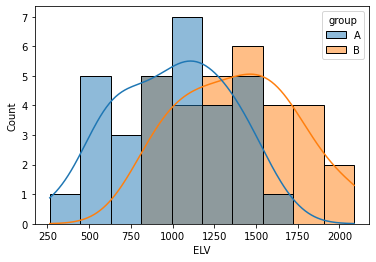

In [37]:
# sns.histplot([xA,xB], colors=['r', 'b'])
sns.histplot(data=df, x="ELV", hue="group", bins=10, kde=True)

<AxesSubplot:>

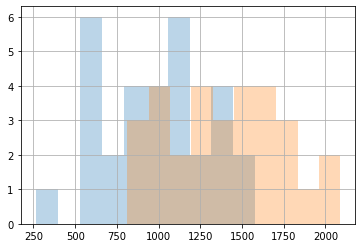

In [12]:
xA.hist(alpha=0.3)
xB.hist(alpha=0.3)

In [13]:
# xA['ELV']

In [14]:
# sample mean and standard deviation are approximations of the population mean and std
meanA = df[df['group']=="A"]['ELV'].mean()
stdA = df[df['group']=="A"]['ELV'].std(ddof=0)
print("The sample mean and sample standard deviation for Group A are:")
meanA, stdA

The sample mean and sample standard deviation for Group A are:


(996.7763447708885, 328.951552348056)

In [15]:
meanB = df[df['group']=="B"]['ELV'].mean()
stdB = df[df['group']=="B"]['ELV'].std()
print("The sample mean and sample standard deviation for Group B are:")
meanB, stdB

The sample mean and sample standard deviation for Group B are:


(1388.6256269647888, 351.04962369197403)

In [16]:
# another way to get an estimate of the population parameters is to
# use the `fit` method on a probability distribution model:
from scipy.stats.distributions import norm

In [17]:
# fit a normal distribution for Group A
norm.fit(df[df['group']=="A"]['ELV'], method="MLE")

(996.7763447708885, 328.951552348056)

In [18]:
# fit a normal distribution for Group B
norm.fit(df[df['group']=="B"]['ELV'], method="MLE")

(1388.6256269647888, 345.14920978875307)

The estimates obtaind from the `fit` method are called "maximum likelyhood estimates" (MLE) meaning the computer went over all the possible parametes for the group mean $\mu$ and standard deviation $\sigma$ and picked the parameters that are most likely to have generated the data.

This is a thing now. Computers are fast enough to perform complicated search algorithms and solve optimization problems in just a few seconds to tell you the parameters $(\mu, \sigma)$ that best describe the data distribution from which the sample comes from.

In [19]:
# the method of moments (MM) is another general-purpse way to
# compute estimates for the model parameters:
#   obtain a formula for the first moment of the distribution (set to the sample mean)
#   obtain a formula for the second moment around mean (set to value computed from sample variance)
norm.fit(df[df['group']=="A"]['ELV'], method="MM")

(996.7763447708885, 328.951552348056)

In [20]:
# note there is a slight difference with the estimate obtained
# using the .std() estimator above (difference due to 1/(n-1) vs. 1/n in formulas)

In [21]:
xB.values

array([1361.52936415, 1469.64147458,  977.03458481, 1417.6005284 ,
        987.33039844, 1118.788726  , 1516.89305384,  873.35994936,
       1613.73128738, 1809.19497582, 1313.95999803, 1642.42432654,
       1867.25029673, 1725.62129066, 1640.23998335, 1232.65594719,
       2061.34038833, 1205.40555518, 1140.14275768, 1590.91287183,
       1496.23763471, 1747.67862339, 1200.5178162 , 2088.12389109,
        844.07661358, 1504.28458373, 1036.9164843 , 1336.60636011,
       1025.67284252,  813.59620101])

<AxesSubplot:ylabel='Count'>

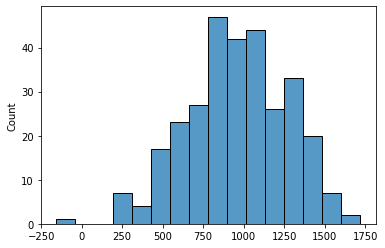

In [22]:
xbarML, sML = norm.fit(df[df['group']=="A"]['ELV'])
xAsim = norm(xbarML, sML)
sns.histplot(xAsim.rvs(300))


### Descriptive statistics

In [23]:
xA[]

SyntaxError: invalid syntax (1825595491.py, line 1)

# Linear models

## Visually explain linear relationship between input and output

Different possible relationships between the number of hours of stats training and ELV gains:

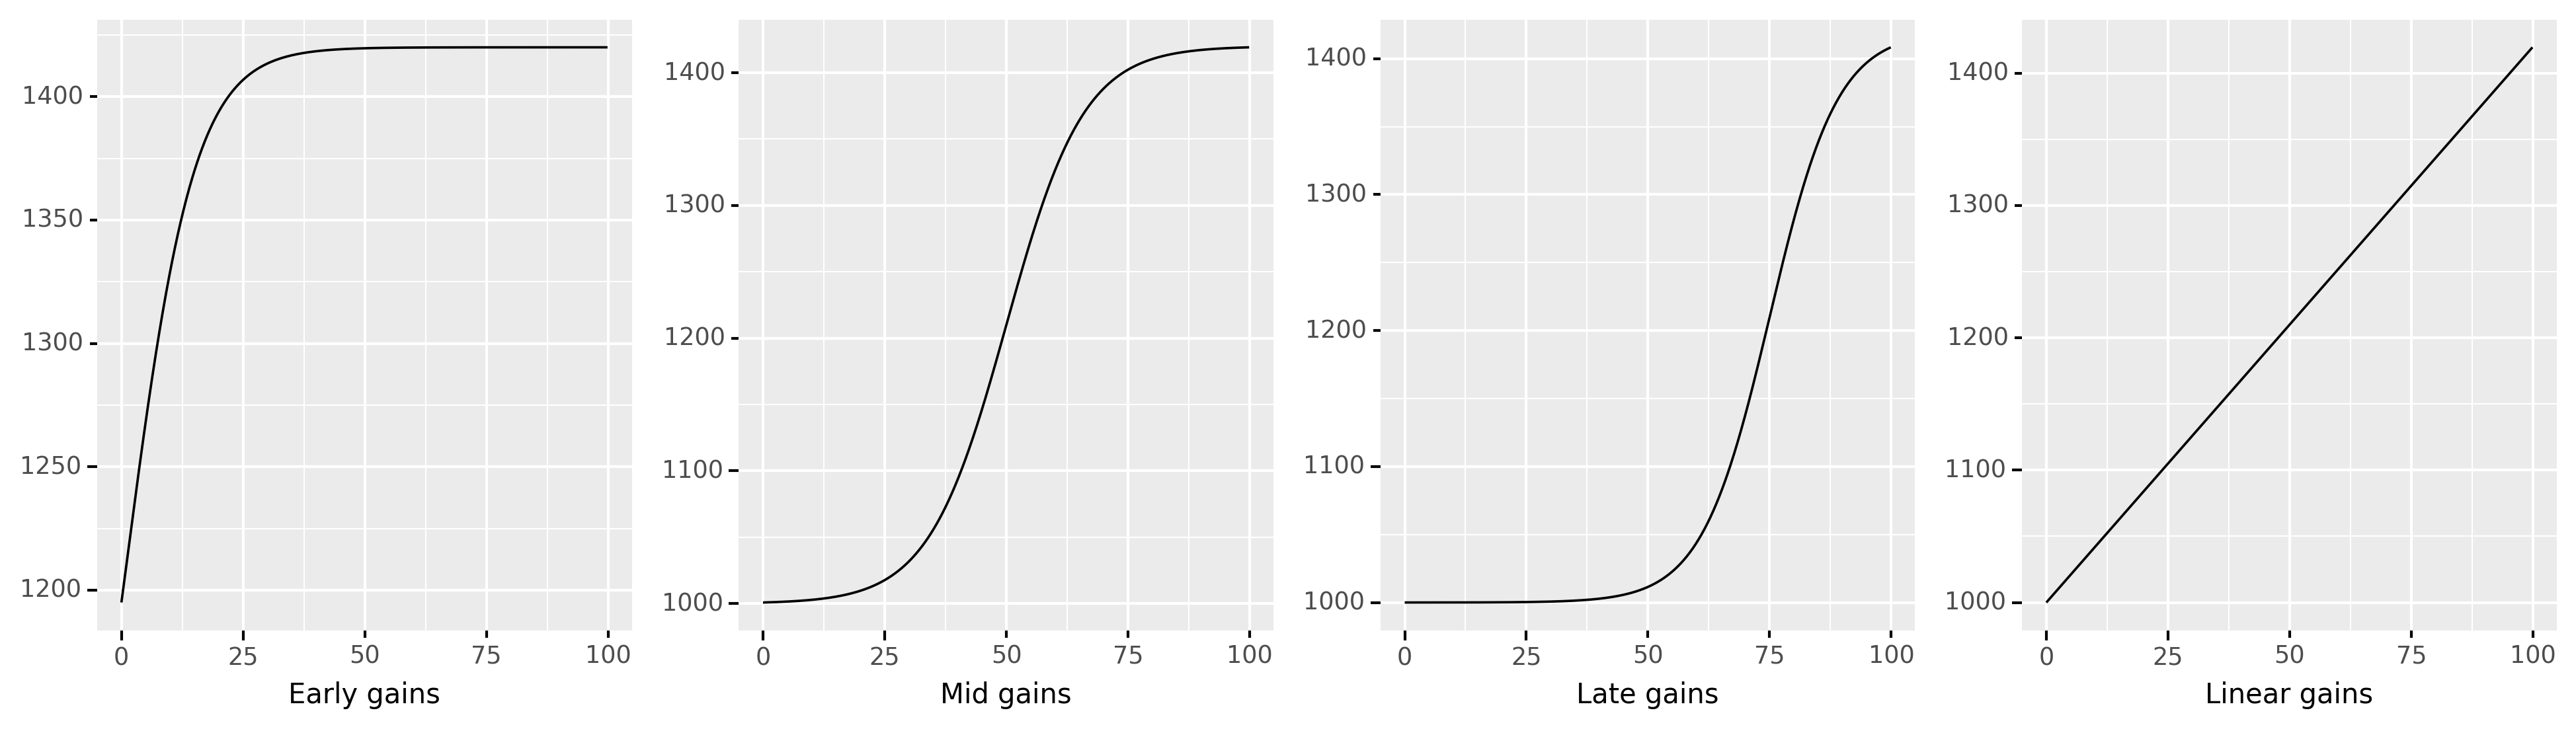

